In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sklearn.linear_model as lm
from sklearn.model_selection import train_test_split
from sklearn import model_selection
%matplotlib inline

[-0.44437228 -1.02285442 -1.11751514 -1.36994371  0.72310986  0.57585986
  0.22877058 -1.76962228 -1.39097942  0.75466343]
[-0.84559104 -0.74385607 -0.89068823 -0.76487722  0.49712368  0.45790586
  0.06157588 -0.94608074 -0.92051564  0.73912523]
294 46.80594789028354 0.017702703438080006
(294,)
[-1.46460442  0.42860986  0.38653843 -2.29551514  0.64948486  0.50223486
  0.74414558  0.67052058  1.42780629  1.41728843]
[-1.33587051  0.47717365  0.19314137 -1.52742244  0.77865473 -0.99212004
  0.88695177  0.83922109  1.48613821  1.89859842]
294 57.95739168579763 0.021920344813085336
(294,)
[-1.23321157 -1.25424728  0.87035986  0.83880629  0.44964558 -2.06412228
  0.48119915  0.59689558  0.50223486  0.44964558]
[-0.99795322 -1.07107228  0.8311184   0.67277175  0.50498302 -1.12211475
 -0.95952964  0.77965538  0.62964626  0.35546691]
294 57.04724323502592 0.021576113175123268
(294,)
[0.90191343 0.73362772 0.63896701 0.51275272 0.41809201 0.39705629
 1.39625272 1.08071701 1.97473486 1.55402058]

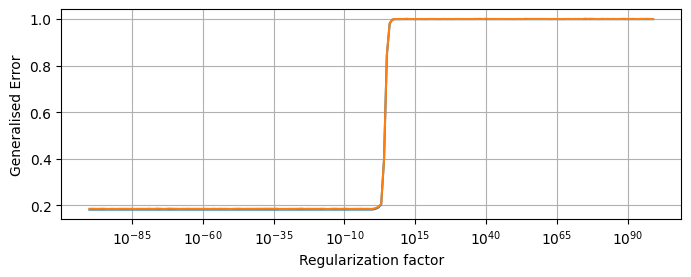

In [2]:

data = pd.read_csv("StandardizedDataFrameWithNansFilled.csv", index_col=0)
data["Status"] = [1 if stat == "Developed" else 0 for stat in data["Status"]]
data.head()

y = data['Life expectancy '].values
y=y.T
X_drop = data.drop(columns = ['Country','Year','Life expectancy '])

# Add offset attribute
attributeNames = X_drop.columns
X_drop = np.concatenate((np.ones((X_drop.shape[0],1)),X_drop),1)
attributeNames = [u'Offset']+attributeNames
N, M = X_drop.shape
X = X_drop

# Values of lambda
lambdas = np.power(10.,range(-100,100))

# Initialize variables


Test =[]
Train =[]
for lamb in lambdas:
    ## Crossvalidation
    # Create crossvalidation partition for evaluation
    K = 10
    CV = model_selection.KFold(K, shuffle=True)

    Error_train_rlr = np.zeros((K,1))
    Error_test_rlr = np.zeros((K,1))

    w_rlr = np.empty((M,K))

    k=0
    for train_index, test_index in CV.split(X,y):
        
        # extract training and test set for current CV fold
        X_train = X[train_index]
        y_train = y[train_index]
        X_test = X[test_index]
        y_test = y[test_index]

        Xty = X_train.T @ y_train
        XtX = X_train.T @ X_train

        # Estimate weights for the value of lambda, on entire training set
        lambdaI = lamb * np.eye(M)
        lambdaI[0,0] = 0 # Do no regularize the bias term
        w_rlr[:,k] = np.linalg.solve(XtX+lambdaI,Xty).squeeze()
        # Compute mean squared error with regularization with lambda
        Error_train_rlr[k] = np.square(y_train-X_train @ w_rlr[:,k]).sum(axis=0)/y_train.shape[0]
        Error_test_rlr[k] = ((y_test-X_test @ w_rlr[:,k])**2).sum(axis=0)/y_test.shape[0]

        print(y_test[:10])
        print((X_test @ w_rlr[:,k])[:10])
        print(len((y_test-X_test @ w_rlr[:,k])**2), sum((y_test-X_test @ w_rlr[:,k])**2), sum((y_test-X_test @ w_rlr[:,k])**2)/y_train.shape[0])
        print(y_test.shape)
        k +=1

        
    Test.append(np.mean(Error_test_rlr))
    Train.append(np.mean(Error_train_rlr))

plt.figure(figsize=(8, 6))
plt.subplot(2,1,1)        
plt.semilogx(lambdas,Train) # Don't plot the bias term\
plt.semilogx(lambdas,Test) # Don't plot the bias term
plt.xlabel('Regularization factor')
plt.ylabel('Generalised Error')
plt.grid()

print(Test[0])




In [3]:
print(Train)

[0.18129220661961742, 0.18128159223281937, 0.18129731050900558, 0.1813038167136287, 0.18129216705070528, 0.18127508950897384, 0.18131860683166426, 0.1813220554100839, 0.18129724238618802, 0.18132233995891728, 0.1812995136430076, 0.18129047632131956, 0.18130296147411115, 0.18129619489543025, 0.18128390368326436, 0.18129204401380786, 0.18132419833881502, 0.1812940994085474, 0.18129700557086942, 0.18130463741654718, 0.18130880242361552, 0.1812719535281706, 0.18130513040433718, 0.1813065429965898, 0.18125320160444192, 0.18128655190119664, 0.18132447330601253, 0.181308860022459, 0.18126295657121394, 0.18127188606029454, 0.18128305663500074, 0.18129068448074134, 0.18131426475098272, 0.1812947786782367, 0.18130460126134793, 0.1812766778214977, 0.18130968268434505, 0.18129398477445757, 0.18130677360898023, 0.18129467536179433, 0.18130843778919875, 0.18128952372157128, 0.18129852917459482, 0.1813199387269384, 0.18128317740913763, 0.18131721536046302, 0.18128729680763486, 0.18129222590122346, 0.

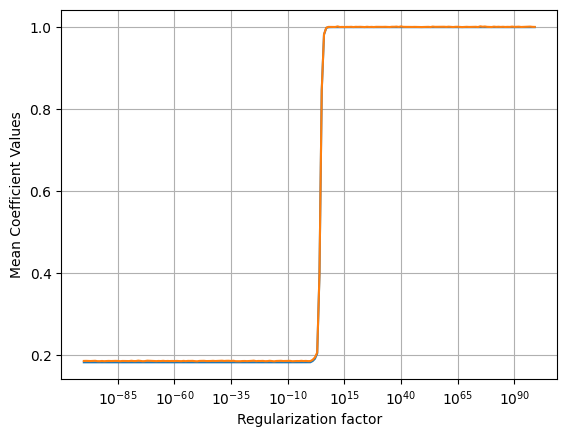

In [4]:
plt.semilogx(lambdas,Train) # Don't plot the bias term\
plt.semilogx(lambdas,Test) # Don't plot the bias term
plt.xlabel('Regularization factor')
plt.ylabel('Mean Coefficient Values')
plt.grid()

In [5]:
from automation import Tester

In [6]:
def linear_regression(X_train, X_test, Y_train, Y_text, variable):
    
    # Whatever you want
    MSE = 55
    return MSE




In [7]:
path = '/Users/william/Documents/University/civil engineering year 4/Semester 1 DTU/Introduction to machine learning/DTU_MachineLearning/Project2/StandardizedDataFrameWithNansFilled.csv'
tester = Tester('LifeExpectancyRegression', path_to_data=path, function_to_test=linear_regression, final_test=False, k = 10, variable = lamb)
tester.error

TypeError: Tester.__init__() got an unexpected keyword argument 'variable'

In [ ]:
|